In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

# KNN classification of penguins.  Hey, you look kind of like that one, and 
# they're a Gentoo, so...

# This is an exploration of the Palmer Station penguins dataset 
# https://allisonhorst.github.io/palmerpenguins/
# Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.
# https://en.wikipedia.org/wiki/Pygoscelis

# Three hundred brush-tailed penguins were briefly captured
# and subjected to humiliating beak, flipper, and weight measurements 
# so that data science students don't have to look at Ronald Fisher's 
# iris dataset.

In [21]:
# There is a mirror of this dataset in vega-datasets.
# see if I'm allowed to download it by curl...
# curl https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json
# !curl -OL https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json 

In [22]:
# Check that the download was data and not a webpage with an error...
# !head penguins.json

In [23]:
penguins = pd.read_json("../data/penguins.json")

In [24]:
# Read in the two sets once they are fixed an in a file:
penguins_train=pd.read_csv( "penguins_train.csv")
penguins_test = pd.read_csv( "penguins_test.csv")
penguins = penguins_train


In [25]:
# How many penguins?
penguins.Species.value_counts(), len(penguins)

(Adelie       117
 Gentoo        92
 Chinstrap     48
 Name: Species, dtype: int64,
 257)

In [26]:
# Dictionary for painting the dots high-contrast colors
colors = { "Adelie" : "green", "Gentoo": "blue", "Chinstrap": "red"}

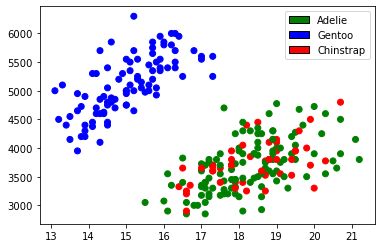

In [27]:
plt.scatter(penguins["Beak Depth (mm)"], penguins["Body Mass (g)"] , color = penguins.Species.map(colors)  )
# Had to look up how to make a legend for this kind of data
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=c[1], edgecolor='k', label=c[0]) for c in colors.items()]
plt.legend(handles=legend_elements)

<AxesSubplot:xlabel='Beak Depth (mm)', ylabel='Body Mass (g)'>

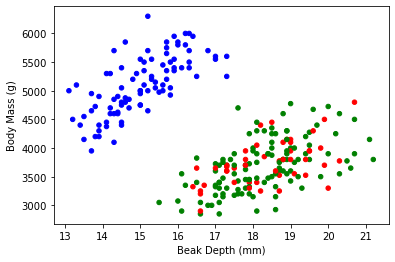

In [28]:
penguins.plot( "Beak Depth (mm)", "Body Mass (g)" , kind="scatter", color = penguins.Species.map(colors)  )

In [29]:
# Since I have to clean.. and I have to clean training and test,
# put all the essential cleaning in a funciton and call it three times.

def penguincleanit(data):
    data["SP1"] = data.Species == "Adelie"
    data["SP2"] = data.Species == "Gentoo"
    data["SP3"] = data.Species == "Chinstrap"
    # construct a class label... Adelie, Gentoo, Chinstrap. 
    # Alphabetical order would probably be a better choice.  WHY? 
    data["LABEL"] = data["SP2"] + 2 * data["SP3"]  
    # I don't know how I'm going to keep Depth / mass / flipper /length straight.
    return data[np.isfinite( data["Beak Depth (mm)"]) & 
                        np.isfinite( data["Body Mass (g)"]) &
                        np.isfinite( data["Flipper Length (mm)"]) & 
                        np.isfinite( data["Beak Length (mm)"])] 
                   
penguinclean = penguincleanit(penguins)
penguins_test = penguincleanit(penguins_test)
penguins_train = penguincleanit(penguins_train)

In [30]:
penguinclean.LABEL.value_counts()


0    116
1     91
2     48
Name: LABEL, dtype: int64

In [31]:
penguins["SP1"].sum(), penguins["SP2"].sum(), penguins["SP3"].sum()

(117, 92, 48)

In [32]:
len(penguins)

257

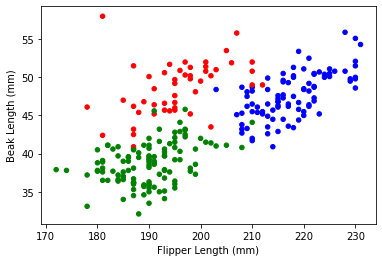

In [33]:
penguins[["Flipper Length (mm)", "Beak Length (mm)"]].plot("Flipper Length (mm)", "Beak Length (mm)", kind="scatter", color = penguins.Species.map(colors))
plt.savefig("PENGUIN.png", dpi=300, bbox_inches="tight")

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
labels= penguins_train.LABEL
X = penguins_train[["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"]].values
XTEST = penguins_test[["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"]].values
YTEST = penguins_test["LABEL"]

In [36]:
np.isnan(X).sum()

0

In [37]:
fit = KNeighborsClassifier().fit(X, labels)  # default n=5

In [38]:
dir(fit)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_y',
 'algorithm',
 'classes_',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_features_in_',
 'n_jobs',
 'n_neighbors',
 'n_samples_fit_',
 'outputs_2d_',
 'p'

In [39]:
fit.predict(XTEST)

array([1, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 2, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0])

In [40]:
penguins_test["KNN"] = fit.predict(XTEST)

In [41]:
penguins_test.groupby(["KNN", "LABEL"]).LABEL.count()

KNN  LABEL
0    0        29
     1         1
     2        11
1    0         3
     1        31
     2         1
2    0         3
     2         8
Name: LABEL, dtype: int64

In [42]:
len(XTEST)

87

In [43]:
# Ok, I get a confusion matrix this way.
# Crude accuracy... 
acc = ( 29 + 31 + 8 ) / 87
acc

0.7816091954022989

In [44]:
# What is my task?  Compare KNN accuracy on test set vs k.

In [45]:
# What do I need to do that ?  A function that returns 
# overall accuracy.  

In [46]:
XTEST[0:5]

array([[  13.8, 4750. ,   44.9,  212. ],
       [  15. , 5500. ,   49.1,  228. ],
       [  15.3, 5550. ,   50. ,  220. ],
       [  18.4, 3400. ,   50.5,  200. ],
       [  17.2, 3550. ,   39.6,  196. ]])

In [47]:
mean0 = penguins_train["Beak Depth (mm)"].mean()
mean1 = penguins_train["Body Mass (g)"].mean() 
mean2 = penguins_train['Beak Length (mm)'].mean()
mean3 = penguins_train["Flipper Length (mm)"].mean()

In [48]:
xgrid = np.arange(170, 230,2) # range for flipper length
ygrid = np.arange(30,59,1)  # range for beak length
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([mean0, mean1, ygrid[j], xgrid[i]])
       # print(x)
        z[i,j]= fit.predict(x[np.newaxis,:])

(30, 29) (30, 29) (30, 29)


In [49]:
XTEST[5]

array([  17. , 6050. ,   59.6,  230. ])

In [50]:
z[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [51]:
fit.predict([[  13.8, 4206 ,  54. ,         222.         ]])

array([0])

(array([ 2., 19., 40., 60., 28., 11., 31., 29., 23., 12.]),
 array([172. , 177.9, 183.8, 189.7, 195.6, 201.5, 207.4, 213.3, 219.2,
        225.1, 231. ]),
 <BarContainer object of 10 artists>)

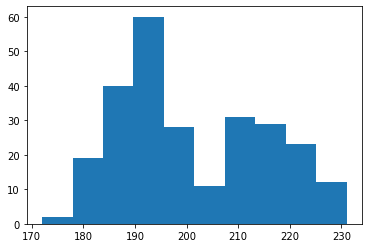

In [52]:
plt.hist(penguins_train["Flipper Length (mm)"])

In [53]:
fit.predict([XTEST[0 ]])

array([1])

Text(0, 0.5, 'Flipper Length (mm)')

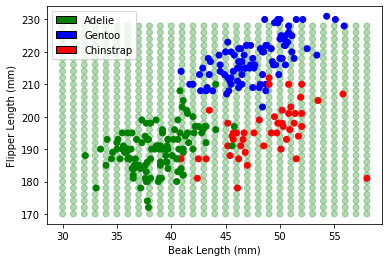

In [54]:
colorsnum = { 0 : "green", 1: "blue", 2:"red"} 
c = [colorsnum[i] for i in z.reshape(-1)]
plt.scatter(yax,xax, color=c, alpha=0.3)

plt.scatter(penguins["Beak Length (mm)"], penguins["Flipper Length (mm)"] , color = penguins.Species.map(colors)  )
plt.legend(handles=legend_elements)
plt.xlabel("Beak Length (mm)")
plt.ylabel( "Flipper Length (mm)")

(array([17., 42., 52., 34., 26., 26., 22., 20., 13.,  3.]),
 array([2850., 3195., 3540., 3885., 4230., 4575., 4920., 5265., 5610.,
        5955., 6300.]),
 <BarContainer object of 10 artists>)

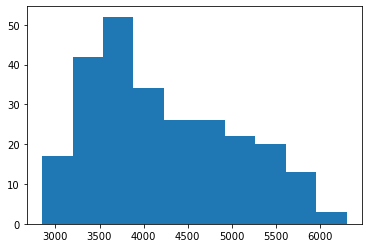

In [55]:
plt.hist(penguins_train["Body Mass (g)"])

(array([15., 24., 22., 28., 29., 41., 38., 37., 14.,  7.]),
 array([13.1 , 13.91, 14.72, 15.53, 16.34, 17.15, 17.96, 18.77, 19.58,
        20.39, 21.2 ]),
 <BarContainer object of 10 artists>)

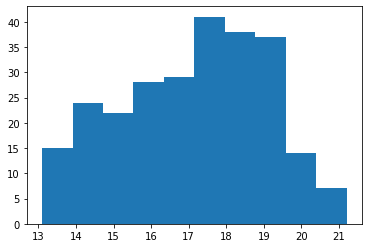

In [77]:
plt.hist(penguins_train["Beak Depth (mm)"])

In [57]:
# When I first saw this I was concerned, and tried fussing with 
# the mean2 and mean3 ... before I remembered, KNN calculates distance
# by default using Pythagoras's theorem... using Euclid's distance.

# Which for penguins is some unholy mixture of sqrt( mm^2 + g^2 )


In [58]:
# How do I specify Mahalanobis metric to KNNC? 

# https://github.com/yzhao062/pyod/issues/23
# KNeighborsClassifier(metric= 'mahalanobis', metric_params={'V': np.cov(X.T)} )
fit2 = KNeighborsClassifier(metric= 'mahalanobis', metric_params={'V': np.cov(X.T)}, n_neighbors=11 ).fit(X, labels )

In [59]:
xgrid = np.arange(170, 230,2) # range for flipper length
ygrid = np.arange(30,59,1)  # range for beak length
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z2 = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([mean0, mean1, ygrid[j], xgrid[i]])
       # print(x)
        z2[i,j]= fit2.predict(x[np.newaxis,:])

(30, 29) (30, 29) (30, 29)


In [60]:
z2[0:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

Text(0, 0.5, 'Flipper Length (mm)')

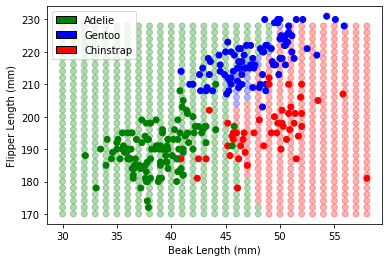

In [61]:
colorsnum = { 0 : "green", 1: "blue", 2:"red"}  # SP1 is is-it-Adelie
c2 = [colorsnum[i] for i in z2.reshape(-1)]
plt.scatter(yax,xax, color=c2, alpha=0.3)

plt.scatter(penguins["Beak Length (mm)"], penguins["Flipper Length (mm)"] , color = penguins.Species.map(colors)  )
plt.legend(handles=legend_elements)
plt.xlabel("Beak Length (mm)")
plt.ylabel( "Flipper Length (mm)")

In [62]:
# It seems like this n=5 classifer does something now..
penguins_test["KNN5M"] = fit2.predict(XTEST)

In [63]:
penguins_test.groupby(["KNN5M", "LABEL"]).LABEL.count()

KNN5M  LABEL
0      0        35
1      1        32
2      2        20
Name: LABEL, dtype: int64

In [64]:
# Ah.  Hmm.  That's better.

In [65]:
# Discussion: What do you do when your accuracy is 100%?

In [66]:
# Target:  loop over n, count accuracy on test set for variety of N.

In [67]:
# Functions:  fit_accuracy(n) ?? 

In [68]:
def fit_accuracy(n):
    dummy = pd.DataFrame({ "LABEL": penguins_test.LABEL})
    fitresult = KNeighborsClassifier(metric= 'mahalanobis', n_neighbors=n, 
            metric_params={'V': np.cov(X.T)} ).fit(X, labels )
    predict = fitresult.predict(XTEST)
    dummy["PREDICT"] = predict
    accuracy =(dummy.query("PREDICT==0 & LABEL==0").count()[0] + 
               dummy.query("PREDICT==1 & LABEL==1").count()[0] + 
               dummy.query("PREDICT==2 & LABEL==2").count()[0]) / XTEST.shape[0]
    return(accuracy)

In [69]:
d=fit_accuracy(3)
d

0.9885057471264368

In [70]:
acc = []
for k in range(1, 201, 2):
    a = fit_accuracy(k)
    acc.append(a)
    print(i, a)

29 0.9655172413793104
29 0.9885057471264368
29 1.0
29 1.0
29 1.0
29 1.0
29 1.0
29 1.0
29 1.0
29 1.0
29 1.0
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9885057471264368
29 0.9770114942528736
29 0.9770114942528736
29 0.9770114942528736
29 0.9770114942528736
29 0.9770114942528736
29 0.9770114942528736
29 0.9770114942528736
29 0.9655172413793104
29 0.9540229885057471
29 0.9425287356321839
29 0.9425287356321839
29 0.9540229885057471
29 0.9310344827586207
29 0.9310344827586207
29 0.9310344827586207
29 0.9080459770114943
29 0.89655172

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "


29 0.7931034482758621
29 0.7931034482758621
29 0.7931034482758621


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "


29 0.7931034482758621
29 0.7931034482758621
29 0.7816091954022989
29 0.7816091954022989


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI t

29 0.7701149425287356
29 0.7701149425287356
29 0.7701149425287356
29 0.7701149425287356


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI t

29 0.7701149425287356
29 0.7701149425287356
29 0.7701149425287356
29 0.7701149425287356
29 0.7701149425287356
29 0.7586206896551724


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI t

29 0.7586206896551724
29 0.7586206896551724
29 0.7586206896551724
29 0.7471264367816092
29 0.7241379310344828
29 0.7241379310344828


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI t

29 0.7241379310344828
29 0.7241379310344828
29 0.7126436781609196
29 0.7011494252873564


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI t

29 0.7011494252873564
29 0.7011494252873564
29 0.7011494252873564
29 0.7011494252873564
29 0.6666666666666666


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI t

29 0.6666666666666666
29 0.6666666666666666
29 0.6666666666666666
29 0.6551724137931034
29 0.6551724137931034


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "


In [71]:
overfit = pd.DataFrame({"k": np.arange(1,201,2), "acc": acc})

Text(0.5, 0, 'k')

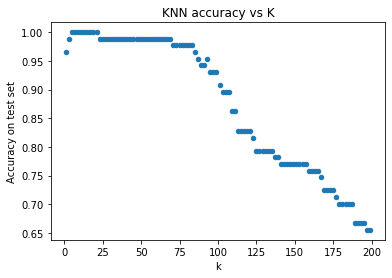

In [72]:
overfit.plot("k", "acc", kind="scatter")
plt.title("KNN accuracy vs K")
plt.ylabel("Accuracy on test set")
plt.xlabel("k")

In [74]:
penguins

,Unnamed: 0,Species,Island,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g),Sex,SP1,SP2,SP3,LABEL
0,198,Chinstrap,Dream,50.1,17.9,190.0,3400.0,FEMALE,False,False,True,2
1,310,Gentoo,Biscoe,47.5,15.0,218.0,4950.0,FEMALE,False,True,False,1
2,223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE,False,True,False,1
3,135,Adelie,Dream,41.1,17.5,190.0,3900.0,MALE,True,False,False,0
4,290,Gentoo,Biscoe,47.7,15.0,216.0,4750.0,FEMALE,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
252,215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,MALE,False,False,True,2
253,74,Adelie,Torgersen,35.5,17.5,190.0,3700.0,FEMALE,True,False,False,0
254,64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,FEMALE,True,False,False,0
255,46,Adelie,Dream,41.1,19.0,182.0,3425.0,MALE,True,False,False,0
